# Lecture 7
1. Variance-Bias Trade-Off
2. Ridge and Lasso Regressions


As model complexity grows, the model’s bias (error due to incorrect assumptions or underfitting) typically **decreases**, while the variance (error due to sensitivity to small fluctuations or overfitting) **increases**.


The **total expected error** is the sum of bias², variance, and irreducible noise;

**high variance** leads to overfitting (model too complex, fits noise).

**high bias** leads to underfitting (model too simple, misses important trends).

A **good model** strikes a balance between these two: **not too simple, not too complex.**

## 1. Variance-Bias Trade-Off
Let's do some math first.

Using regression, we can buulid a model based on the training data 
$$y=f(x)+\varepsilon,$$
which is an estmate of the underlying true model $\hat{f}(x)$.

The expectation of the squared error is

$$\begin{aligned}
\mathbb{E}\left[\left(y-\hat{f}(x)\right)^2\right]  &= \mathbb{E}\left[y^2-2y\hat{f}(x)+\hat{f}^2(x)\right]\\
&= \mathbb{E}\left[y^2\right]-2\mathbb{E}[y]~\mathbb{E}\left[\hat{f}(x)\right]+\mathbb{E}\left[\hat{f}^2(x)\right]\\
&= \mathbb{E}\left[(y-\mathbb{E}[y])^2\right]+\mathbb{E}^2\left[y\right]-2\mathbb{E}[y]~\mathbb{E}\left[\hat{f}(x)\right]+\mathbb{E}\left[\left(\hat{f}(x)-\mathbb{E}\left[\hat{f}(x)\right]\right)^2\right]+\mathbb{E}^2\left[\hat{f}(x)\right]\\
&=\mathbb{E}\left[\left(\hat{f}(x)-\mathbb{E}\left[\hat{f}(x)\right]\right)^2\right]+   ~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Variance}\\
&~~~~~\left(\mathbb{E}[y]-\mathbb{E}\left[\hat{f}(x)\right]\right)^2+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Bias}\\
&~~~~~\mathbb{E}\left[\left(y-\mathbb{E}(y)\right)^2\right] ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{Noise}
\end{aligned}$$
where the third step follows from 
$$\mathbb{E}[Z^2]=\mathbb{E}\left[\left(Z-\mathbb{E}[Z]\right)^2\right] + \mathbb{E}^2[Z].$$


$$
\mathbb{E}\big[(y - \hat{f}(x))^2\big] 
= 
\underbrace{\mathbb{E}\big[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2\big]}_{\text{Variance}}
+ 
\underbrace{\big(\mathbb{E}[\hat{f}(x)] - \mathbb{E}[y]\big)^2}_{\text{Bias}^2}
+ 
\underbrace{\mathbb{E}\big[(y - \mathbb{E}[y])^2\big]}_{\text{Noise}}.
$$


Notice $\mathbb{E}\left[\left(y-\mathbb{E}(y)\right)^2\right]$ is the irreducible error.

This decomposition shows that apart from the noise, there are two sources of error in our model.

* **Variance** tells us how sensitive the model is to small perturbations in the training set.

* **Bias** is related to the difference between the expected value of our estimator and its true value.

* High variance results in *overfitting*.

* High bias results in *under-fitting*.

Finding a good model is therefore a matter of balancing the variance and the bias. 
* This tradeoff applies to algorithms used in supervised learning

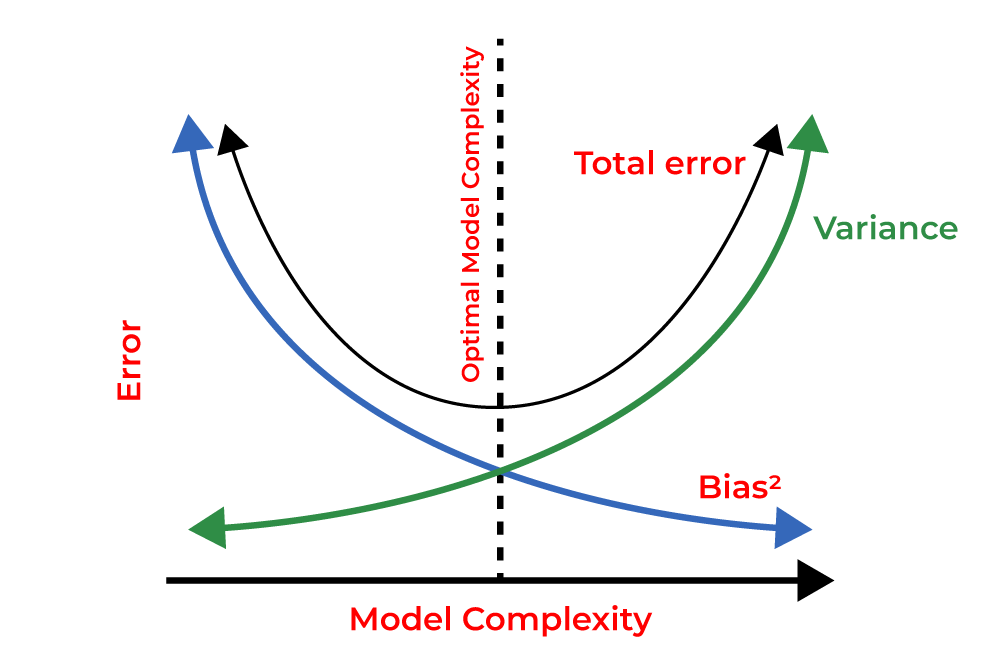

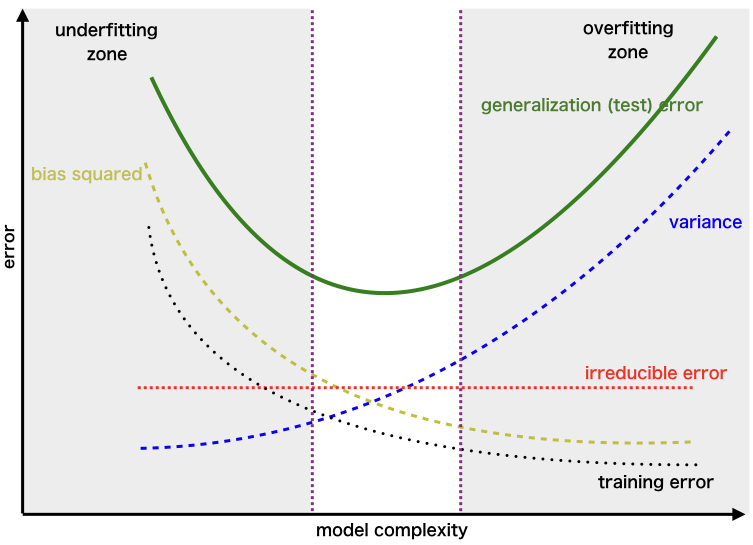

## 2. Ridge and Lasso Regressions
In general, linear regression exhibits high variance and low bias.

It should therefore stand to reason that lowering the variance at the expense of the bias is the way to go.

Smaller coefficients $\beta$ are less sensitive thus leads to smaller variance. Although the estimate will be more biased, but remember that we were happy to sacrifice some of that to make up for the variance.

To keep the coefficients small, we can add regularization terms to the model, which will penalize the model for increased complexity as given by the size of the coefficients. 

### Ridge Regression
Add $\ell_2$-norm as the regularization term.

Recall $$\|\beta\|_2 = \sqrt{\beta_0^2+\beta_1^2+\cdots}$$
is basically Euclidean distance.

The regression model is so-called ridge regression
$$ \beta^{\text{ridge}}=\min_{\beta} \|\mathbf{Y}-\mathbf{X}\beta\|_2^2+\lambda\|\beta\|_2^2$$
where $\lambda$ is the regularization parameter to balance the fit and penalty.

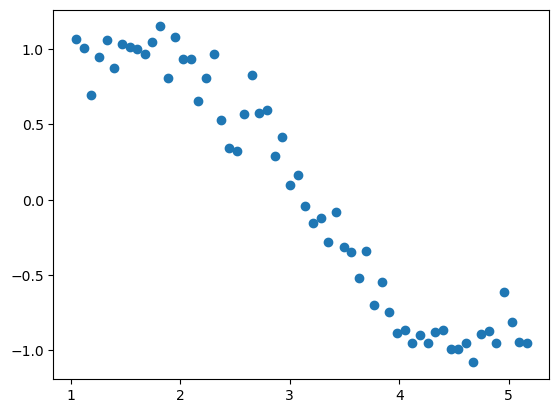

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(10)  #Setting seed for reproducability

# Sin function from 60deg to 300deg (converted to radians)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.scatter(x,y)
plt.show()

- **Setting the Seed:** `np.random.seed(10)` ensures that the random noise added to $y$ is the same each time the code is run. This makes the results reproducible.  

- **Data Generation:** The code constructs an array `x` of angles from 60° to 296° (step 4°) converted to radians. The corresponding `y` values are generated from the true function $\sin(x)$ with added Gaussian noise (`np.random.normal(0, 0.15, len(x))` draws random noise with mean 0 and standard deviation 0.15).  
  This simulates a real-world scenario where data has an underlying true pattern (sine wave) plus some randomness (noise).  

- **Visualization:** `plt.scatter(x, y)` plots the generated data points. At this stage, we see a noisy sinusoidal curve. This **original data** represents the “ground truth” we aim to model. The scatter plot helps us visualize the pattern and the noise before fitting any models.


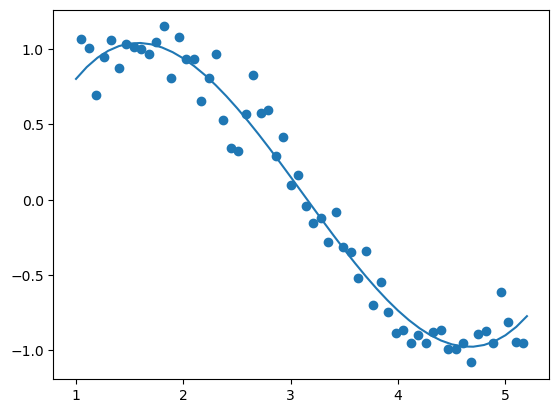

In [10]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

- **Polynomial Fit (degree 3):** `np.polyfit(x, y, 3)` fits a 3rd-degree polynomial to the data (using least squares). It returns the polynomial coefficients, which `np.poly1d` then converts into a polynomial function `mymodel` that can be evaluated.  
  A 3rd-degree polynomial is relatively simple for a sinusoidal pattern, so we expect it might **underfit** (high bias).

- **Plotting the Model:** The code plots the original data points again (scatter) and then `plt.plot` the polynomial model’s predictions.  
  It uses `np.arange(1, 5.3, 0.1)` as the x-range in radians (~57° to 303°) to draw a smooth curve of the fitted polynomial. This curve represents our model $\hat{f}(x)$.

- **Observation:** The degree-3 polynomial provides a fairly smooth curve that captures the general trend of the sine wave but likely misses some curvature.  
  In bias-variance terms, this model has **high bias** – it’s too simple to capture all the oscillations of the true function.  
  If you compare the curve to the data, it might not flex enough to pass through all clusters of points, indicating **underfitting** (the model’s expected value $\mathbb{E}[\hat{f}(x)]$ is far from the true $f(x)$ for many regions, hence a large bias).  
  However, the simplicity means variance is low – if we sampled a different noisy dataset, the degree-3 fit wouldn’t change wildly.


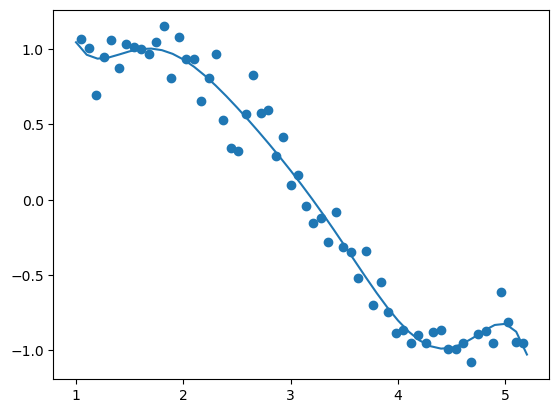

In [11]:
mymodel = np.poly1d(np.polyfit(x, y, 7))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

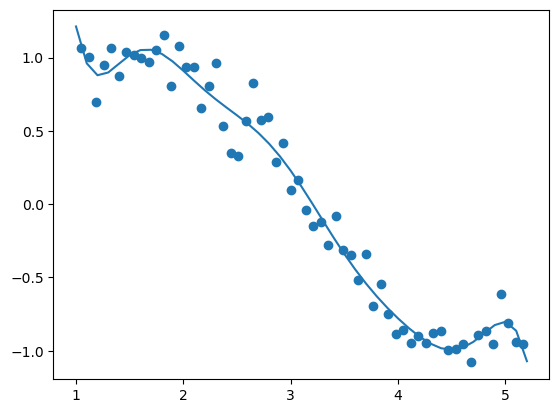

In [12]:
mymodel = np.poly1d(np.polyfit(x, y, 11))

plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

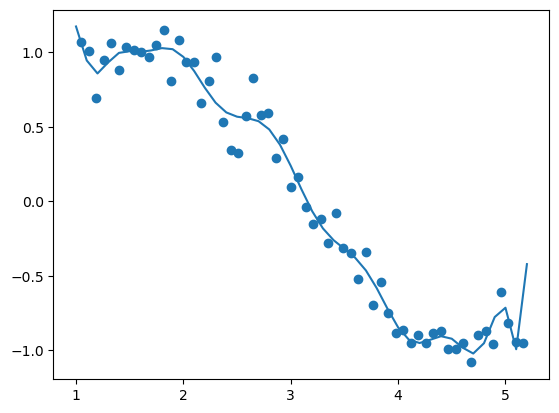

In [13]:
mymodel = np.poly1d(np.polyfit(x, y, 15))


plt.scatter(x, y)
plt.plot(np.arange(1,5.3,0.1), mymodel(np.arange(1,5.3,0.1)))
plt.show()

- **Increasing Model Complexity:** Each segment of code raises the polynomial degree.  
  A 7th-degree polynomial will bend more to fit the data than the 3rd-degree did; 11th and 15th degrees add even more flexibility.  
  By the 15th-degree polynomial, the model has enough parameters to potentially go through or very near every data point (since there are 60 data points and a 15th-degree polynomial has 16 parameters including the constant term).

- **Visualization:** After each fit, the code plots the new polynomial curve against the data.  
  As the degree increases, you would see the fitted curve wiggle more tightly around the data points. By degree 15, the curve will likely pass through many of the noisy fluctuations in the data.

- **Observation:** The 15th-degree model will have **very low bias** – it can approximate the training data’s sine wave shape extremely well, capturing minor dips and wiggles.  
  However, this comes at the cost of **high variance**. The polynomial is so flexible that it’s fitting the noise in this particular sample of data. If we took a new sample of noisy points from the same process, a 15th-degree fit would vary dramatically.  

  In other words, the model is now **overfitting** the training data: it has learned not just the true signal (sin curve) but also the random noise.  
  This corresponds to the **high variance regime** of the bias-variance trade-off.  

  High variance means the model’s predictions $\hat{f}(x)$ are very sensitive to the specific data it was trained on – small changes in the training set would lead to big changes in the fitted polynomial curve.


By contrasting the 3rd-degree and 15th-degree fits (and the ones in between), the notebook demonstrates the bias-variance trade-off in action. The 3rd-degree polynomial (low complexity) underfits (high bias, low variance), whereas the 15th-degree polynomial (high complexity) overfits (low bias, high variance). The intermediate degrees (7 or 11) might achieve a better balance, but without a validation set or cross-validation in this part, the notebook doesn’t explicitly identify the “best” degree. The key lesson is that finding the right complexity is crucial: a model should be complex enough to capture true structure but simple enough to avoid chasing noise. In practice, we use techniques like cross-validation to choose model complexity (e.g. polynomial degree or regularization strength) that minimizes generalization error.

Let try ridge regression that fits 15th order polynomial, with different regularization parameters.

In [14]:
from sklearn.linear_model import Ridge


x_all_power = np.append(np.ones(len(x)),x[:])



for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)


x_all_power = np.reshape(x_all_power,(16,60)).T
print(x_all_power)

[[1.00000000e+00 1.04719755e+00 1.09662271e+00 1.14838062e+00
  1.20258137e+00 1.25934027e+00 1.31877804e+00 1.38102114e+00
  1.44620195e+00 1.51445914e+00 1.58593791e+00 1.66079029e+00
  1.73917553e+00 1.82126035e+00 1.90721938e+00 1.99723547e+00]
 [1.00000000e+00 1.11701072e+00 1.24771295e+00 1.39370874e+00
  1.55678761e+00 1.73894845e+00 1.94242406e+00 2.16970850e+00
  2.42358766e+00 2.70717340e+00 3.02394171e+00 3.37777531e+00
  3.77301124e+00 4.21449401e+00 4.70763499e+00 5.25847875e+00]
 [1.00000000e+00 1.18682389e+00 1.40855095e+00 1.67170192e+00
  1.98401578e+00 2.35467732e+00 2.79458730e+00 3.31668298e+00
  3.93631860e+00 4.67171696e+00 5.54450530e+00 6.58035136e+00
  7.80971820e+00 9.26876015e+00 1.10003860e+01 1.30555209e+01]
 [1.00000000e+00 1.25663706e+00 1.57913670e+00 1.98440171e+00
  2.49367273e+00 3.13364157e+00 3.93785014e+00 4.94844842e+00
  6.21840369e+00 7.81427654e+00 9.81970950e+00 1.23398109e+01
  1.55066637e+01 1.94862483e+01 2.44871418e+01 3.07714499e+01]
 [1.

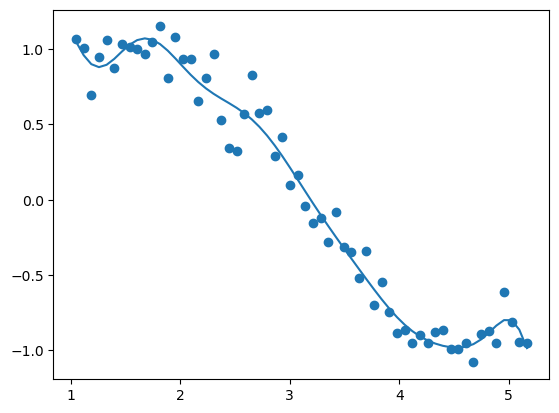

In [15]:
from sklearn.linear_model import Ridge

x_all_power = np.append(np.ones(len(x)),x[:])

for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)
    
x_all_power = np.reshape(x_all_power,(16,60)).T

############################################################################

ridge_reg = Ridge(alpha=1e-10)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

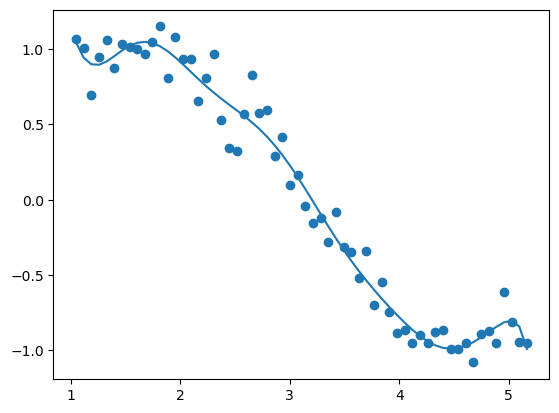

In [16]:
ridge_reg = Ridge(alpha=1e-5)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.30262e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


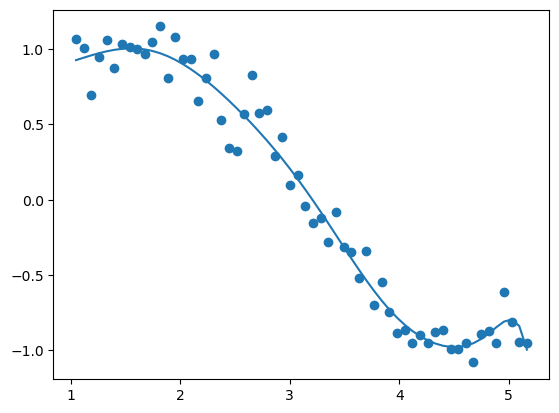

In [17]:
ridge_reg = Ridge(alpha=0.1)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.78031e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


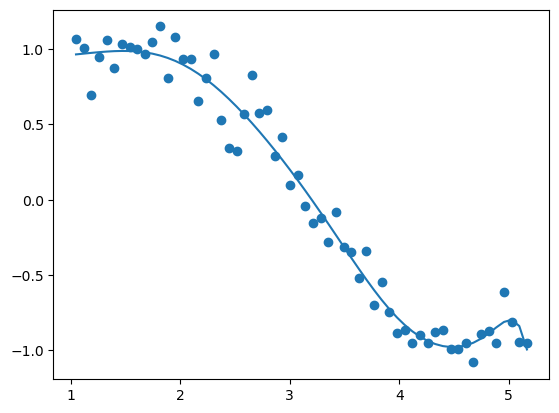

In [18]:
ridge_reg = Ridge(alpha=10)  #python use alpha in place of lambda
ridge_reg.fit(x_all_power,y)
y_pred = ridge_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

K-fold cross-validation

In [19]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

lambda_range = np.linspace(1e-5,1,1000)  # cut to 1000 intervals
lambda_grid = [{'alpha': lambda_range}]

ridge_reg = Ridge()
cv_ridge = GridSearchCV(estimator=ridge_reg, param_grid=lambda_grid, cv=ms.KFold(n_splits=6))

cv_ridge.fit(x_all_power,y)



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.61484e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.67806e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.30181e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.72682e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-05, 1.01099099e-03, 2.01198198e-03, 3.01297297e-03,
       4.01396396e-03, 5.01495495e-03, 6.01594595e-03, 7.01693694e-03,
       8.01792793e-03, 9.01891892e-03, 1.00199099e-02, 1.10209009e-02,
       1.20218919e-02, 1.30228829e-02, 1.40238739e-02, 1.50248649e-0...
       9.76977207e-01, 9.77978198e-01, 9.78979189e-01, 9.79980180e-01,
       9.80981171e-01, 9.81982162e-01, 9.82983153e-01, 9.83984144e-01,
       9.84985135e-01, 9.85986126e-01, 9.86987117e-01, 9.87988108e-01,
       9.88989099e-01, 9.89990090e-01, 9.90991081e-01, 9.91992072e-01,
       9.92993063e-01, 9.93994054e-01, 9.94995045e-01, 9.95996036e-01,
       9.96997027e-01, 9.97998018e-01, 9.98999009e-01, 1.00000000e+00])}])

In [20]:
print(cv_ridge.best_params_['alpha'])

0.995996036036036


### Lasso Regression
Add $\ell_1$-norm as the regularization term.

Recall $$\|\beta\|_1 = |\beta_0|+|\beta_1|+\cdots$$
is basically Manhattan distance.

The regression model is so-called Lasso regression
$$ \beta^{\text{lasso}}=\min_{\beta} \|\mathbf{Y}-\mathbf{X}\beta\|_2^2+\lambda\|\beta\|_1$$
where $\lambda$ is the regularization parameter to balance the fit and penalty.

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.873e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


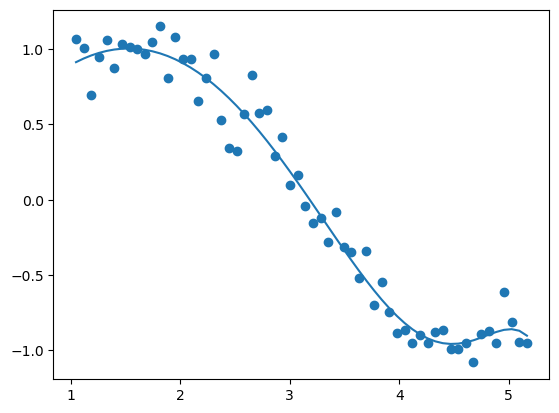

In [21]:
from sklearn.linear_model import Lasso

x_all_power = np.append(np.ones(len(x)),x[:])

for power in range(2,16):
    x_all_power = np.append(x_all_power,x**power)
    
x_all_power = np.reshape(x_all_power,(16,60)).T

############################################################################

lasso_reg = Lasso(alpha=1e-5)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.557e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


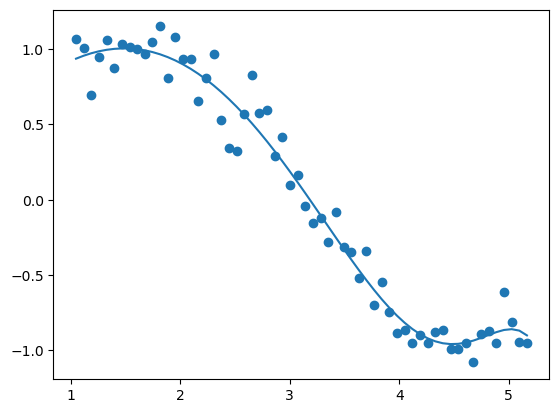

In [22]:
lasso_reg = Lasso(alpha=1e-3)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.846e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


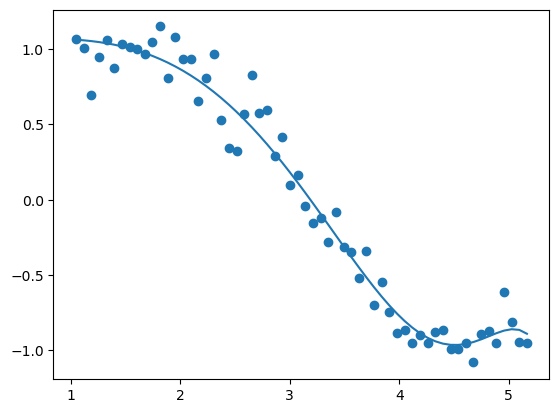

In [23]:
lasso_reg = Lasso(alpha=1e-2)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


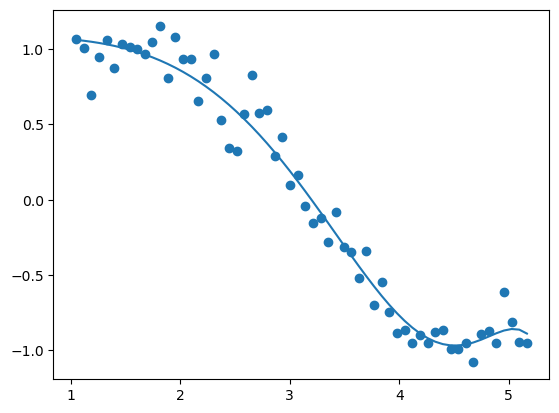

In [24]:
lasso_reg = Lasso(alpha=0.1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
y_pred = lasso_reg.predict(x_all_power)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [25]:
# k-fold
lambda_range = np.linspace(1e-5,1,1000)  # cut to 1000 intervals
lambda_grid = [{'alpha': lambda_range}]

lasso_reg = Lasso()
cv_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lambda_grid, cv=ms.KFold(n_splits=6))

cv_lasso.fit(x_all_power,y)



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.279e-01, tolerance: 2.647e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.872e-01, tolerance: 2.786e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.929e-01, toler

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
             estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-05, 1.01099099e-03, 2.01198198e-03, 3.01297297e-03,
       4.01396396e-03, 5.01495495e-03, 6.01594595e-03, 7.01693694e-03,
       8.01792793e-03, 9.01891892e-03, 1.00199099e-02, 1.10209009e-02,
       1.20218919e-02, 1.30228829e-02, 1.40238739e-02, 1.50248649e-0...
       9.76977207e-01, 9.77978198e-01, 9.78979189e-01, 9.79980180e-01,
       9.80981171e-01, 9.81982162e-01, 9.82983153e-01, 9.83984144e-01,
       9.84985135e-01, 9.85986126e-01, 9.86987117e-01, 9.87988108e-01,
       9.88989099e-01, 9.89990090e-01, 9.90991081e-01, 9.91992072e-01,
       9.92993063e-01, 9.93994054e-01, 9.94995045e-01, 9.95996036e-01,
       9.96997027e-01, 9.97998018e-01, 9.98999009e-01, 1.00000000e+00])}])

In [27]:
print(cv_lasso.best_params_['alpha'])

0.4714767567567568


### Lasso => Sparsity

In [28]:
lasso_reg = Lasso(alpha=0.0001)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

[ 0.00000000e+00  1.06719444e+00 -2.96234509e-01 -2.43064880e-02
 -5.58286596e-04  2.99991273e-04  8.81929759e-05  1.73887444e-05
  2.86588416e-06  4.07403449e-07  4.70046985e-08  2.97353035e-09
 -5.33120358e-10 -2.96743614e-10 -9.04240240e-11 -2.30266542e-11]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.947e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


In [29]:
lasso_reg = Lasso(alpha=0.1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.63313620e-03
 -1.05460849e-02 -3.23709117e-05  1.42600157e-04  2.62141834e-05
  4.12424297e-06  5.73626910e-07  6.61173030e-08  4.57255919e-09
 -5.48220931e-10 -3.48338556e-10 -1.07514621e-10 -2.73446353e-11]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


In [30]:
lasso_reg = Lasso(alpha=1)  #python use alpha in place of lambda
lasso_reg.fit(x_all_power,y)
print(lasso_reg.coef_)

[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.38641276e-03 -1.97277786e-03  1.44697064e-04  5.49548274e-05
  6.76417940e-06  7.98946837e-07  7.83249014e-08  3.40814615e-09
 -1.15382238e-09 -5.02293601e-10 -1.39865790e-10 -3.35545028e-11]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+00, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


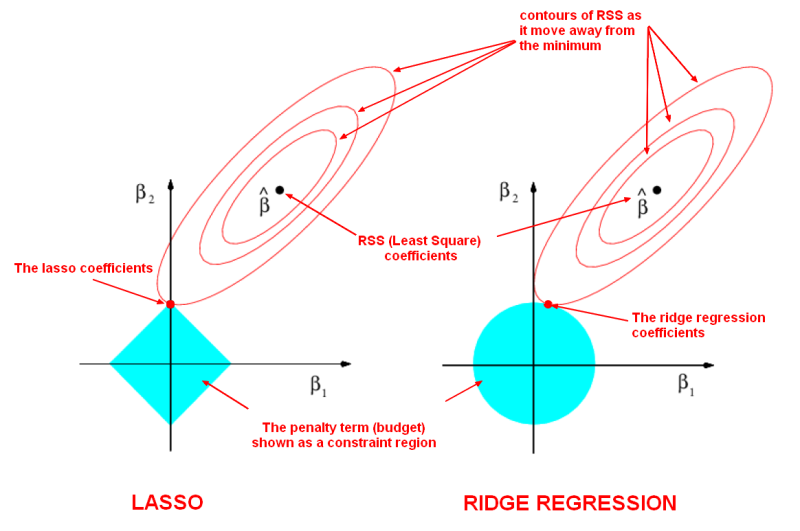

Sparsity is very useful for feature selection!